# K Nearest Neighbor Modeling

In [16]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,8)})

# Label/Feature Split

In [18]:
df = pd.read_csv('../features_30_sec.csv')

labels_series = df['label']
features_df = df.drop(['filename','length','label'], axis=1)
features_df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [19]:
genres = np.unique(labels_series)
label_map = {np.unique(labels_series)[i]:i for i in range(10)}
labels_series = labels_series.map(lambda i: label_map[i])

In [20]:
features_scaled_nparray = StandardScaler().fit_transform(features_df)
features_scaled_df = pd.DataFrame(features_scaled_nparray)
features_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,-0.661934,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,0.795823,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,-0.744406,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,-0.246530,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,-0.190517,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


# KNN Training

In [21]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled_df, labels_series, test_size = 0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)

(800, 57)
(200, 57)


In [23]:
scores_list1 = []
scores_list2 = []
best_model = None
best_accuracy = 0
kstar = None
pstar = None
for p in range(1,3):
    for k in range(2,16): 
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        test_acc = accuracy_score(y_test,y_pred)
        if p == 1:
            scores_list1.append(test_acc)
        else:
            scores_list2.append(test_acc)
        if test_acc > best_accuracy: # and k >= 5:
            best_model = knn
            best_accuracy = test_acc
            kstar = k
            pstar = p
print(f'Best Model = {best_model} Best k = {kstar} Best Accuracy = {best_accuracy}')

Best Model = KNeighborsClassifier(p=1) Best k = 5 Best Accuracy = 0.745


# Optimal Hyperparameters

Text(0.5, 1.0, 'Test Accuracy With Distance Measure: Manhattan')

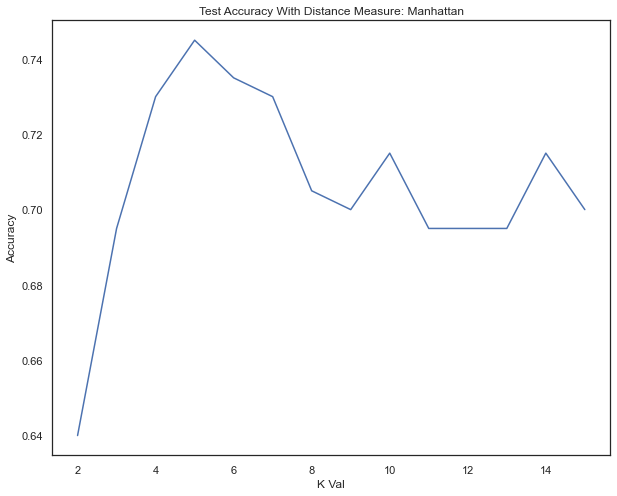

In [24]:
plt.plot(range(2,16),scores_list1)
plt.xlabel('K Val')
plt.ylabel('Accuracy')
plt.title('Test Accuracy With Distance Measure: Manhattan')

Text(0.5, 1.0, 'Test Accuracy With Distance Measure: Euclidean')

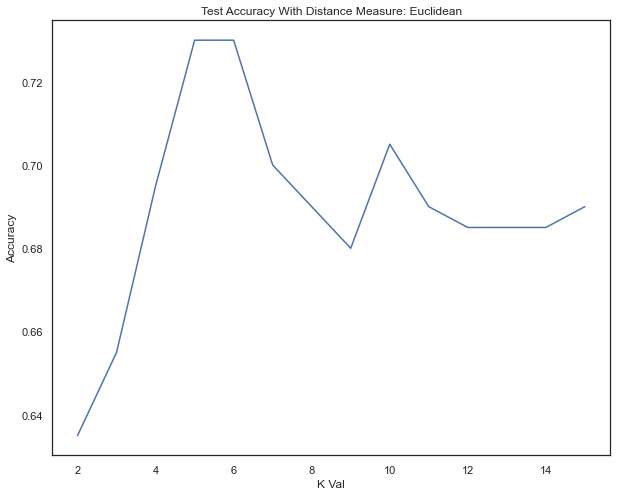

In [25]:
plt.plot(range(2,16),scores_list2)
plt.xlabel('K Val')
plt.ylabel('Accuracy')
plt.title('Test Accuracy With Distance Measure: Euclidean')

# Confusion Matrix

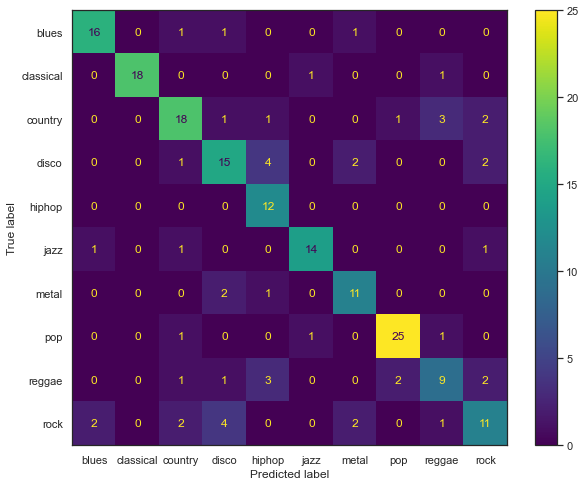

In [26]:
preds = best_model.predict(X_test)
accuracy = accuracy_score(preds, y_test)
confusion_mat = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=genres)
disp.plot()

# Real Talk: How am I not Overfitting??? I'll take it though

In [27]:
train_y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
print(f"Test Acc: {best_accuracy} Train Acc: {train_acc}")

Test Acc: 0.745 Train Acc: 0.79125


# Accuracy For Predicting Each Label (Code from Daniel <3)

       label  accuracy
1  classical  0.956522
2    country  0.904762
7        pop  0.875000
0      blues  0.866667
5       jazz  0.851852
3      disco  0.846154
6      metal  0.809524
8     reggae  0.476190
4     hiphop  0.450000
9       rock  0.266667


<BarContainer object of 10 artists>

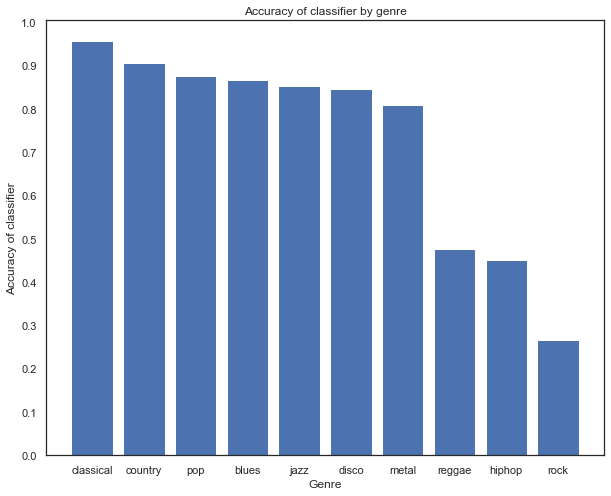

In [13]:
diag_entries = [confusion_mat[i,i] for i in range(len(confusion_mat))]
class_accuracy = diag_entries / np.sum(confusion_mat, axis=0)
label_names = list(label_map.keys())

acc_df = pd.DataFrame({'label':label_names, 'accuracy':class_accuracy})
acc_df = acc_df.sort_values(by='accuracy', ascending=False)
print(acc_df)

plt.xlabel('Genre')
plt.ylabel('Accuracy of classifier')

plt.yticks(np.arange(0,1.05,step=0.1))

plt.title('Accuracy of classifier by genre')
plt.bar(acc_df['label'], acc_df['accuracy'])